In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv ("/content/drive/My Drive/Untitled folder/saitej1.csv")
data

Age          workclass  fnlwgt  ... hours-per-week  native-country  salary
0       39          State-gov   77516  ...             40   United-States   <=50K
1       50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
2       38            Private  215646  ...             40   United-States   <=50K
3       53            Private  234721  ...             40   United-States   <=50K
4       28            Private  338409  ...             40            Cuba   <=50K
...    ...                ...     ...  ...            ...             ...     ...
32556   27            Private  257302  ...             38   United-States   <=50K
32557   40            Private  154374  ...             40   United-States    >50K
32558   58            Private  151910  ...             40   United-States   <=50K
32559   22            Private  201490  ...             20   United-States   <=50K
32560   52       Self-emp-inc  287927  ...             40   United-States    >50K

[32561 rows x 15 columns]

In [ ]:
data.isnull()

Age  workclass  fnlwgt  ...  hours-per-week  native-country  salary
0      False      False   False  ...           False           False   False
1      False      False   False  ...           False           False   False
2      False      False   False  ...           False           False   False
3      False      False   False  ...           False           False   False
4      False      False   False  ...           False           False   False
...      ...        ...     ...  ...             ...             ...     ...
32556  False      False   False  ...           False           False   False
32557  False      False   False  ...           False           False   False
32558  False      False   False  ...           False           False   False
32559  False      False   False  ...           False           False   False
32560  False      False   False  ...           False           False   False

[32561 rows x 15 columns]

In [ ]:
list(data.columns)

['Age',
 'workclass',
 'fnlwgt',
 'education',
 'education -number',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'Gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [ ]:
data.isnull().sum()

Age                  0
workclass            0
fnlwgt               0
education            0
education -number    0
marital-status       0
occupation           0
relationship         0
race                 0
Gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [ ]:
data.describe()

Age        fnlwgt  ...  capital-loss  hours-per-week
count  32561.000000  3.256100e+04  ...  32561.000000    32561.000000
mean      38.581647  1.897784e+05  ...     87.303830       40.437456
std       13.640433  1.055500e+05  ...    402.960219       12.347429
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.178270e+05  ...      0.000000       40.000000
50%       37.000000  1.783560e+05  ...      0.000000       40.000000
75%       48.000000  2.370510e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   education          32561 non-null  object
 4   education -number  32561 non-null  int64 
 5   marital-status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   race               32561 non-null  object
 9   Gender             32561 non-null  object
 10  capital-gain       32561 non-null  int64 
 11  capital-loss       32561 non-null  int64 
 12  hours-per-week     32561 non-null  int64 
 13  native-country     32561 non-null  object
 14  salary             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
n_of_records = len(data)
n_of_records

32561

In [ ]:
df = data.groupby(['salary']).salary.count()

In [ ]:
df

salary
 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [ ]:
##Income of people greater than 50K
n_greater_50k = df[1]
n_greater_50k

7841

In [ ]:
##Income of people atmost 50k
n_at_most_50k = df[0]
n_at_most_50k

24720

In [ ]:
greater_percent = (n_greater_50k / n_of_records) * 100
greater_percent

24.080955744602438

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


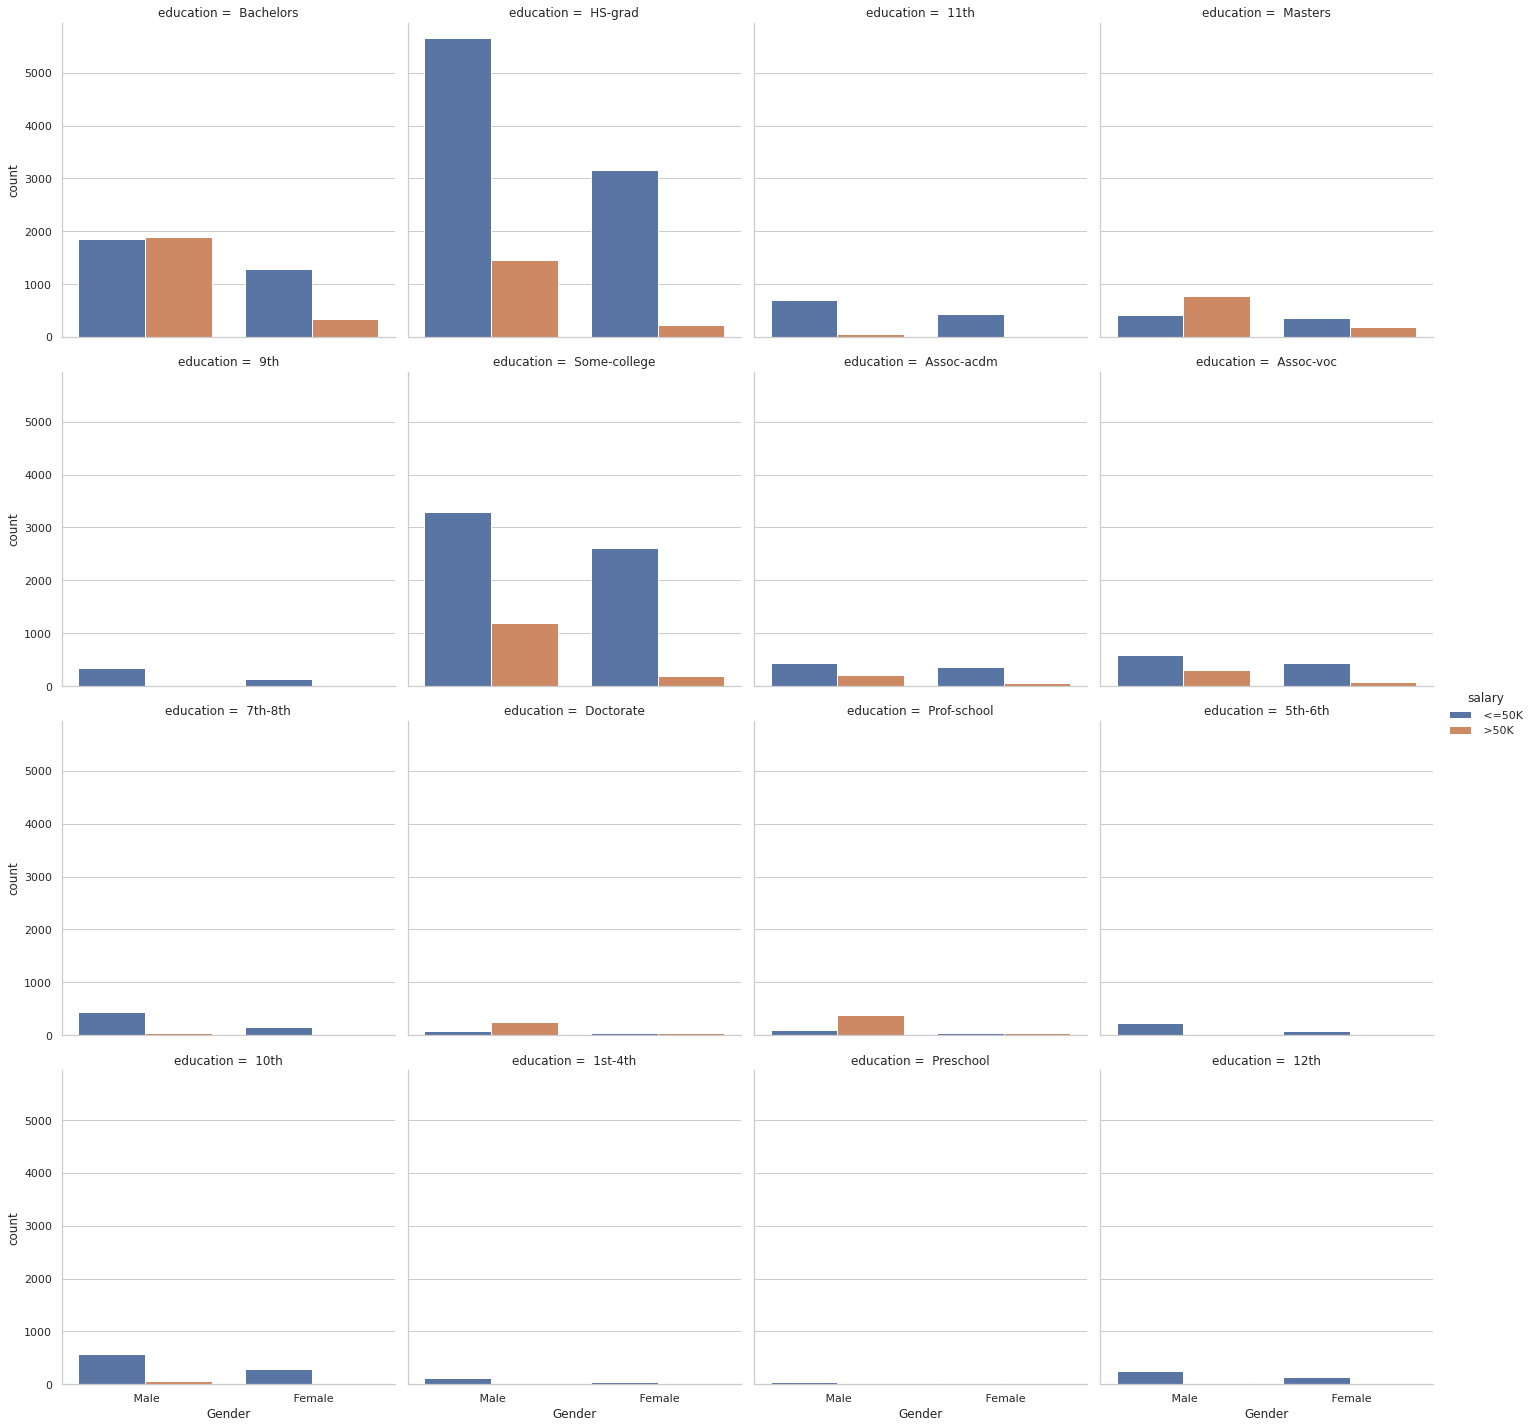

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.factorplot("Gender", col='education', data=data, hue='salary', kind="count", col_wrap=4);

In [ ]:
income_raw = data['salary']
features_raw = data.drop('salary', axis = 1)

# Visualize skewed continuous features of original data


In [ ]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1)) #add 1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Age', 'education -number', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(5))

Age          workclass  ...  hours-per-week  native-country
0  0.301370          State-gov  ...        0.397959   United-States
1  0.452055   Self-emp-not-inc  ...        0.122449   United-States
2  0.287671            Private  ...        0.397959   United-States
3  0.493151            Private  ...        0.397959   United-States
4  0.150685            Private  ...        0.397959            Cuba

[5 rows x 14 columns]

In [ ]:
#Creating dummies
features = pd.get_dummies(features_raw)


from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder1 = LabelEncoder()
data['income'] = labelencoder1.fit_transform(data['salary'])
labelencoder2 = LabelEncoder()
data['sex'] = labelencoder2.fit_transform(data['Gender'])
labelencoder3 = LabelEncoder()
data['race'] = labelencoder3.fit_transform(data['race'])

data

Age          workclass  fnlwgt  ...  salary  income sex
0       39          State-gov   77516  ...   <=50K       0   1
1       50   Self-emp-not-inc   83311  ...   <=50K       0   1
2       38            Private  215646  ...   <=50K       0   1
3       53            Private  234721  ...   <=50K       0   1
4       28            Private  338409  ...   <=50K       0   0
...    ...                ...     ...  ...     ...     ...  ..
32556   27            Private  257302  ...   <=50K       0   0
32557   40            Private  154374  ...    >50K       1   1
32558   58            Private  151910  ...   <=50K       0   0
32559   22            Private  201490  ...   <=50K       0   1
32560   52       Self-emp-inc  287927  ...    >50K       1   0

[32561 rows x 17 columns]

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    income_raw,
                                                    test_size = 0.2,
                                                    random_state = 0)

# Showing the results of the split
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

26048
6513
26048
6513


In [ ]:
#import,inttialize and fit
#import the RFC From sklearn
from sklearn.ensemble import RandomForestClassifier

#intialize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)

#fit RFC to the dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#predict on training data
#syntax:objectname.predict(Inputvalues)
y_pred_train = rfc.predict(X_train)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     19802
        >50K       1.00      1.00      1.00      6246

    accuracy                           1.00     26048
   macro avg       1.00      1.00      1.00     26048
weighted avg       1.00      1.00      1.00     26048



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.9990786240786241

In [ ]:
#predicition on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4918
        >50K       0.73      0.62      0.67      1595

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [ ]:
from sklearn.linear_model import LogisticRegression
logrk=LogisticRegression()

In [ ]:
logrk.fit(X_train,y_train) #train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred=logrk.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[19802,     0],
       [ 6246,     0]])

In [ ]:
print(classification_report(y_train,y_train_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86     19802
        >50K       0.00      0.00      0.00      6246

    accuracy                           0.76     26048
   macro avg       0.38      0.50      0.43     26048
weighted avg       0.58      0.76      0.66     26048



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7602119164619164

In [ ]:
logrk.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_pred = logrk.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[4918,    0],
       [1595,    0]])

In [ ]:
print(classification_report(y_train,y_train_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86     19802
        >50K       0.00      0.00      0.00      6246

    accuracy                           0.76     26048
   macro avg       0.38      0.50      0.43     26048
weighted avg       0.58      0.76      0.66     26048



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7602119164619164

In [ ]:
logrk.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_pred = logrk.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[4918,    0],
       [1595,    0]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4918
        >50K       0.00      0.00      0.00      1595

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7551051742668509

In [ ]:
accuracy_score(y_test,y_pred_test)

0.8512206356517734

In [ ]:
# Apply the naive Bayes Algorithm
# Import BernNB
from sklearn.naive_bayes import BernoulliNB
# creating an object for BerNB
model_BernNB = BernoulliNB()

In [ ]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_train_pred = model_BernNB.predict(X_train)

In [ ]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[14826,  4976],
       [ 1297,  4949]])

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.75      0.83     19802
        >50K       0.50      0.79      0.61      6246

    accuracy                           0.76     26048
   macro avg       0.71      0.77      0.72     26048
weighted avg       0.82      0.76      0.77     26048



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7591753685503686

In [ ]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_test, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_test_pred = model_BernNB.predict(X_test)

In [ ]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[3692, 1226],
       [ 350, 1245]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.75      0.82      4918
        >50K       0.50      0.78      0.61      1595

    accuracy                           0.76      6513
   macro avg       0.71      0.77      0.72      6513
weighted avg       0.81      0.76      0.77      6513



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7580224167050514